In [1]:
import json
import importlib
import matplotlib.pyplot as plt
import os
import sys
from multiplex import drawable
from tqdm.notebook import tqdm

jsontweets = json.load(open('Data/MeanSentiment.json'))
tweets = {jsontweets[id]['id']: jsontweets[id]['text'] for id in jsontweets}
LanguageP = tweets

In [2]:
_date_range = os.listdir('Data/FilteredTwitterIDs/')
dates = {'Dec':[], 'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[]}
for date in _date_range:
    if '0' in date:
        new_date = '01/'
    if '1' in date:
        new_date = '07/'
    if '2' in date:
        new_date = '14/'
    if '3' in date:
        new_date = '21/'
    if '4' in date:
        if 'May' in date:
             new_date = '26/'
        else:
             new_date = '28/'

    if 'December' in date:
        new_date += '12'
        dates['Dec'].append(new_date)
    if 'January' in date:
        new_date += '01'
        dates['Jan'].append(new_date)
    if 'February' in date:
        new_date += '02'
        dates['Feb'].append(new_date)
    if 'March' in date:
        new_date += '03'
        dates['Mar'].append(new_date)
    if 'April' in date:
        new_date += '04'
        dates['Apr'].append(new_date)
    if 'May' in date:
        new_date += '05'
        dates['May'].append(new_date)

date_range = []

for month in dates:
    for date in dates[month]:
        date_range.append(date)

In [3]:
drawable = importlib.reload(drawable)
# reload the style
plt.style.use(os.path.join(sys.path[0], 'styles', "multiplex-dark.style"))

# create a general style
style = { 'linewidth': 2, 'label_style': { 'fontweight': 500 } }

en_style = { 'color': '#F6B913', 'label': 'English' }
es_style = { 'color': '#8B6508', 'label': 'Spanish' }
fr_style = { 'color': '#6BAEDF', 'label': 'French' }
de_style = { 'color': '#00B2EE', 'label': 'German' }
nl_style = { 'color': '#00EE00', 'label': 'Dutch' }
it_style = { 'color': '#9D1309', 'label': 'Italian' }

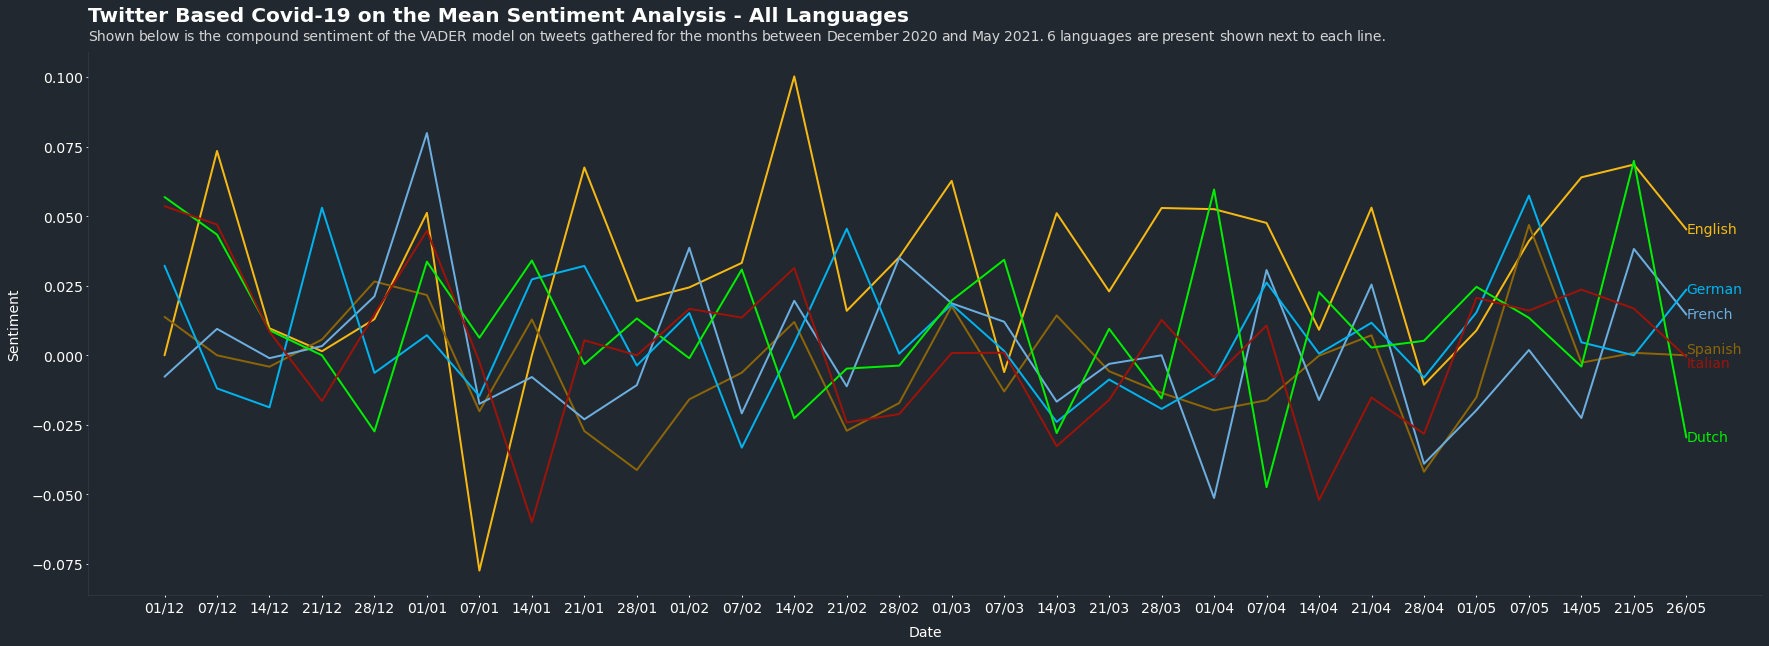

In [4]:
# draw the visualization
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), LanguageP[1], **style, **en_style)
viz.draw_time_series(range(0, 30), LanguageP[2], **style, **es_style)
viz.draw_time_series(range(0, 30), LanguageP[3], **style, **fr_style)
viz.draw_time_series(range(0, 30), LanguageP[4], **style, **de_style)
viz.draw_time_series(range(0, 30), LanguageP[5], **style, **nl_style)
viz.draw_time_series(range(0, 30), LanguageP[6], **style, **it_style)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Mean Sentiment Analysis - All Languages', loc='left')
viz.set_caption("""Shown below is the compound sentiment of the VADER model on tweets
                gathered for the months between December 2020 and May 2021.
                6 languages are present shown next to each line.
                """, align='justify')
viz.savefig(fname='All',dpi=300, bbox_inches='tight')
viz.show()

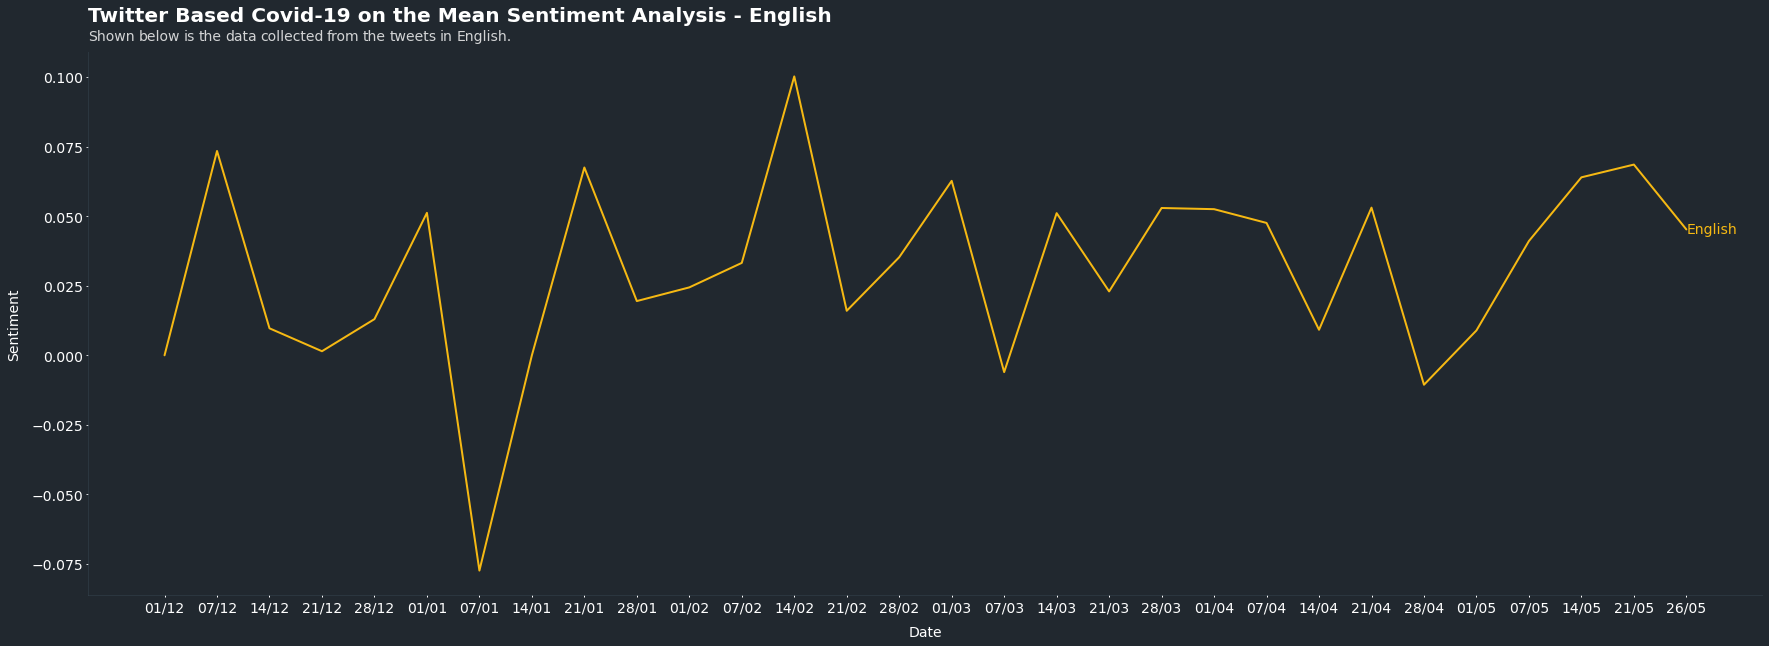

In [5]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), LanguageP[1], **style, **en_style)

plt.xticks(range(0, 30), date_range)
# viz.set_xticks(range(0, 30))#, date_range
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Mean Sentiment Analysis - English', loc='left')
viz.set_caption("""Shown below is the data collected from the tweets in English.""", align='justify')
viz.savefig(fname='English',dpi=300, bbox_inches='tight')

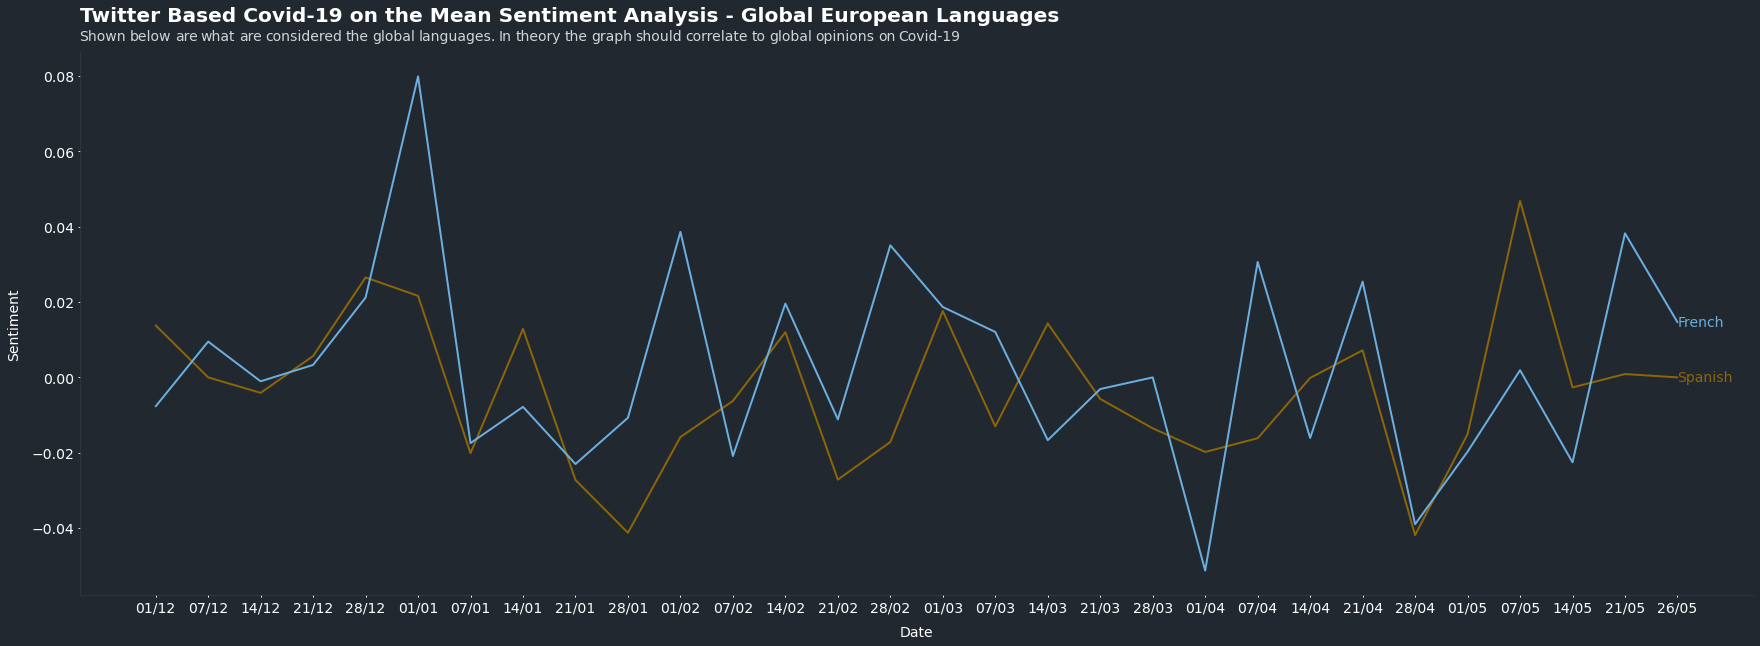

In [6]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), LanguageP[2], **style, **es_style)
viz.draw_time_series(range(0, 30), LanguageP[3], **style, **fr_style)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Mean Sentiment Analysis - Global European Languages', loc='left')
viz.set_caption("""Shown below are what are considered the global languages.
                    In theory the graph should correlate to global opinions on Covid-19""", align='justify')
viz.savefig(fname='Global',dpi=300, bbox_inches='tight')
viz.show()

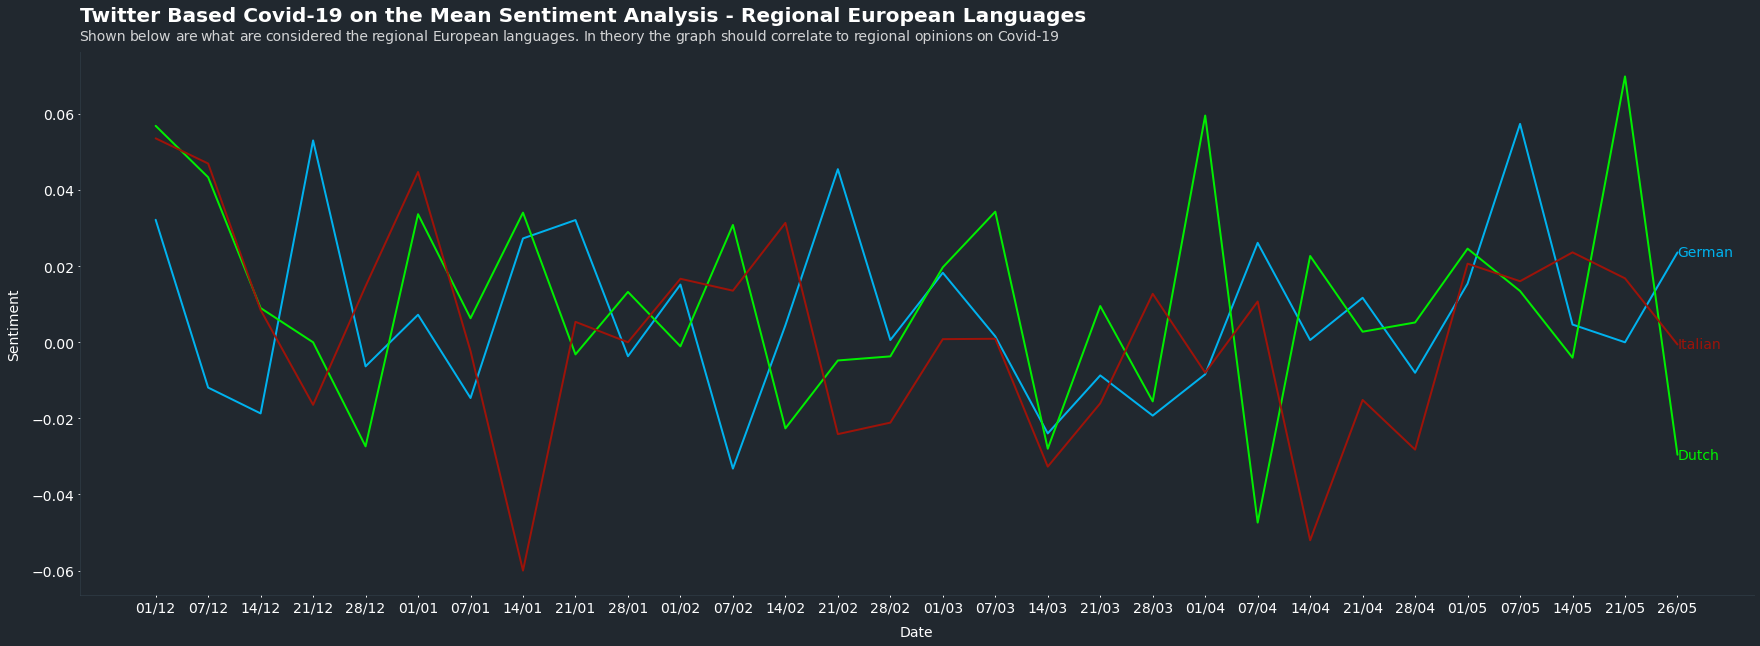

In [7]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), LanguageP[4], **style, **de_style)
viz.draw_time_series(range(0, 30), LanguageP[5], **style, **nl_style)
viz.draw_time_series(range(0, 30), LanguageP[6], **style, **it_style)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Mean Sentiment Analysis - Regional European Languages', loc='left')
viz.set_caption("""Shown below are what are considered the regional European languages.
                    In theory the graph should correlate to regional opinions on Covid-19""", align='justify')
viz.savefig(fname='Europe',dpi=300, bbox_inches='tight')
viz.show()


In [9]:
from collections import defaultdict
import pandas as pd

LanguageDataFrames = defaultdict(lambda: [])

languages = {
                1: 'en',
                2: 'es',
                3: 'fr',
                4: 'de',
                5: 'nl',
                6: 'it',
            }

for month in tqdm(['December', 'January', 'February', 'March', 'April', 'May']):
    for day in [0, 1, 2, 3, 4]:
        for language in languages:
            path = 'Data/Analyzed/' + str(month) + str(day) + languages[language] + '.json'
            LanguageDataFrames[language].append(pd.read_json(path))

  0%|          | 0/6 [00:00<?, ?it/s]

In [10]:
distribution =  {
                    1: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    2: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    3: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    4: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    5: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    6: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]}
                }

for l in [1,2,3,4,5,6]:
    for df in tqdm(LanguageDataFrames[l]):
        # df = df.T
        day = {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]}
        for item in df['Score']:
            if item >= 0.75:
                day['very_positive'].append(item)
            elif 0.25 <= item < 0.75:
                day['positive'].append(item)
            elif -0.25 <= item < 0.25:
                day['neutral'].append(item)
            elif -0.75 <= item < 0.25:
                day['negative'].append(item)
            elif item < -0.75:
                day['very_negative'].append(item)

        for c in distribution[l]:
            distribution[l][c].append(day[c])

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [11]:
counts =    {
                1: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                2: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                3: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                4: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                5: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                6: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]}
            }

for l in [1,2,3,4,5,6]:
    for d in distribution[l]:
        for item in distribution[l][d]:
            counts[l][d].append(len(item))

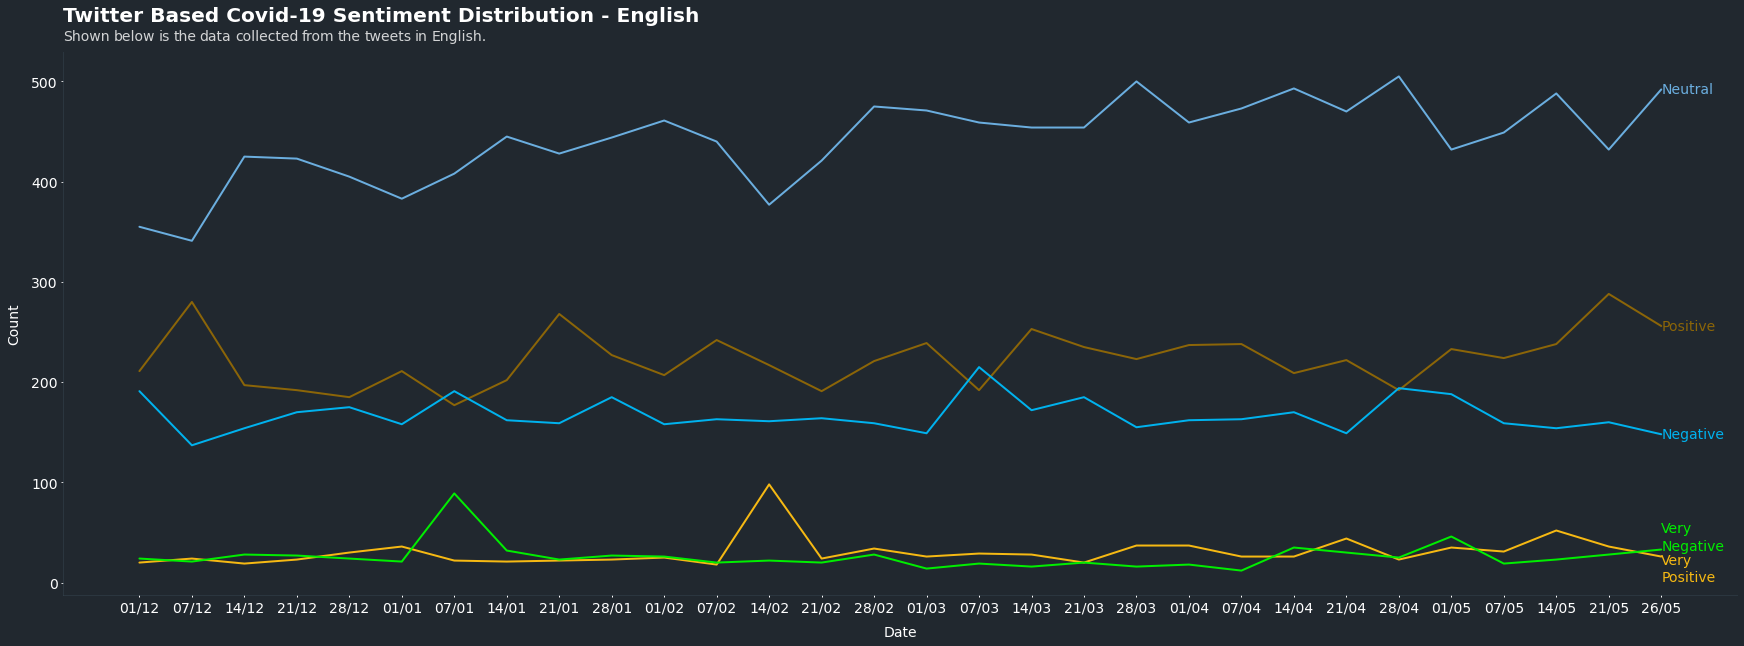

In [14]:
vp_style = { 'color': '#F6B913', 'label': 'Very Positive' }
p_style = { 'color': '#8B6508', 'label': 'Positive' }
nn_style = { 'color': '#6BAEDF', 'label': 'Neutral' }
n_style = { 'color': '#00B2EE', 'label': 'Negative' }
vn_style = { 'color': '#00EE00', 'label': 'Very Negative' }

def plotDistributionLines(count, title, caption, figname):
    figure = plt.figure(figsize=(30, 10))
    viz = drawable.Drawable(figure)
    viz.draw_time_series(range(0, 30), count['very_positive'], **style, **vp_style)
    viz.draw_time_series(range(0, 30), count['positive'], **style, **p_style)
    viz.draw_time_series(range(0, 30), count['neutral'], **style, **nn_style)
    viz.draw_time_series(range(0, 30), count['negative'], **style, **n_style)
    viz.draw_time_series(range(0, 30), count['very_negative'], **style, **vn_style)

    plt.xticks(range(0, 30), date_range)
    # viz.set_xticks(range(0, 30))#, date_range
    viz.set_xlabel('Date')
    viz.set_ylabel('Count')
    viz.set_title(title, loc='left')
    viz.set_caption(caption, align='justify')
    viz.savefig(fname=figname,dpi=300, bbox_inches='tight')

title = 'Twitter Based Covid-19 Sentiment Distribution - English'
caption = """Shown below is the data collected from the tweets in English."""
figname = 'EnglishDistribution'

plotDistributionLines(counts[1], title, caption, figname)

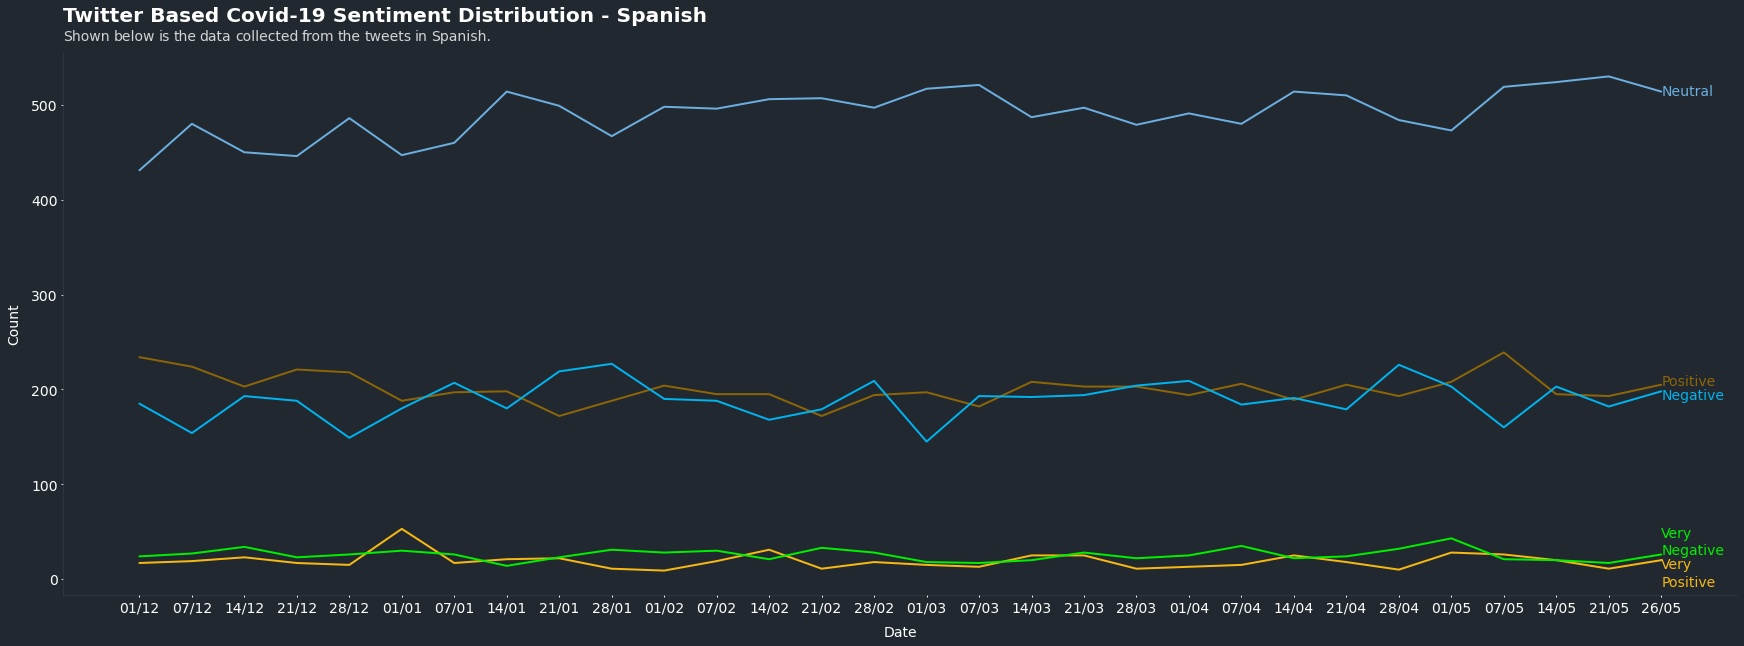

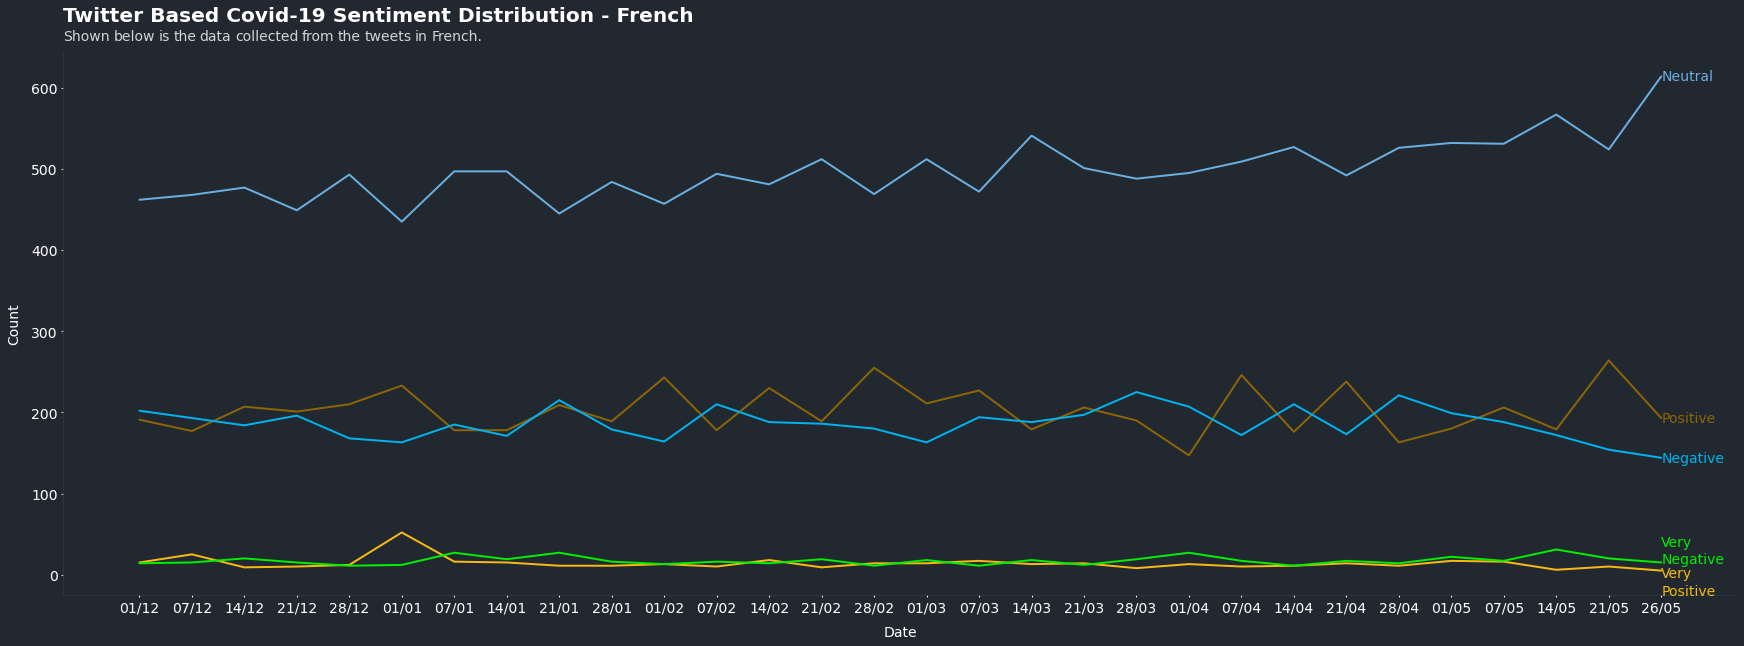

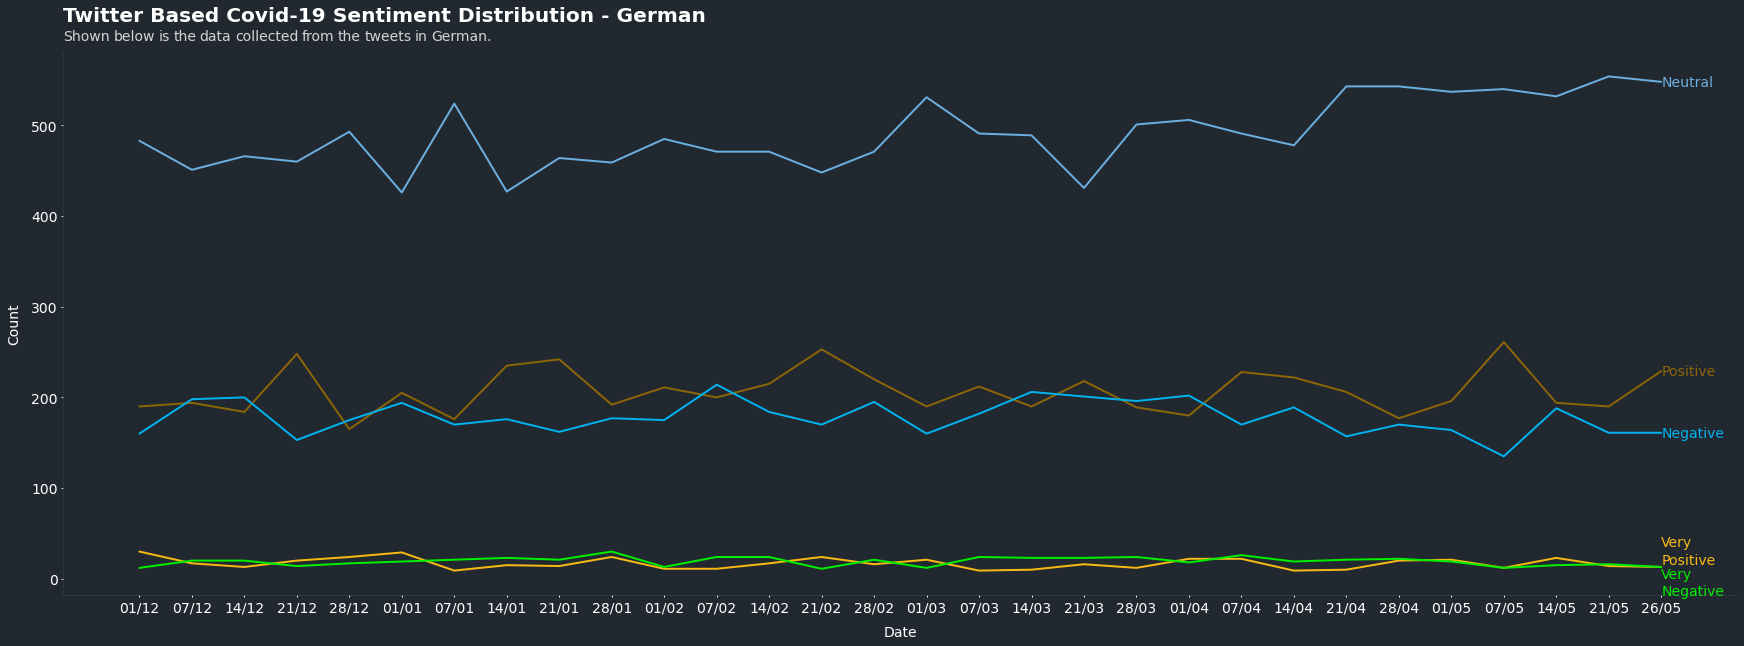

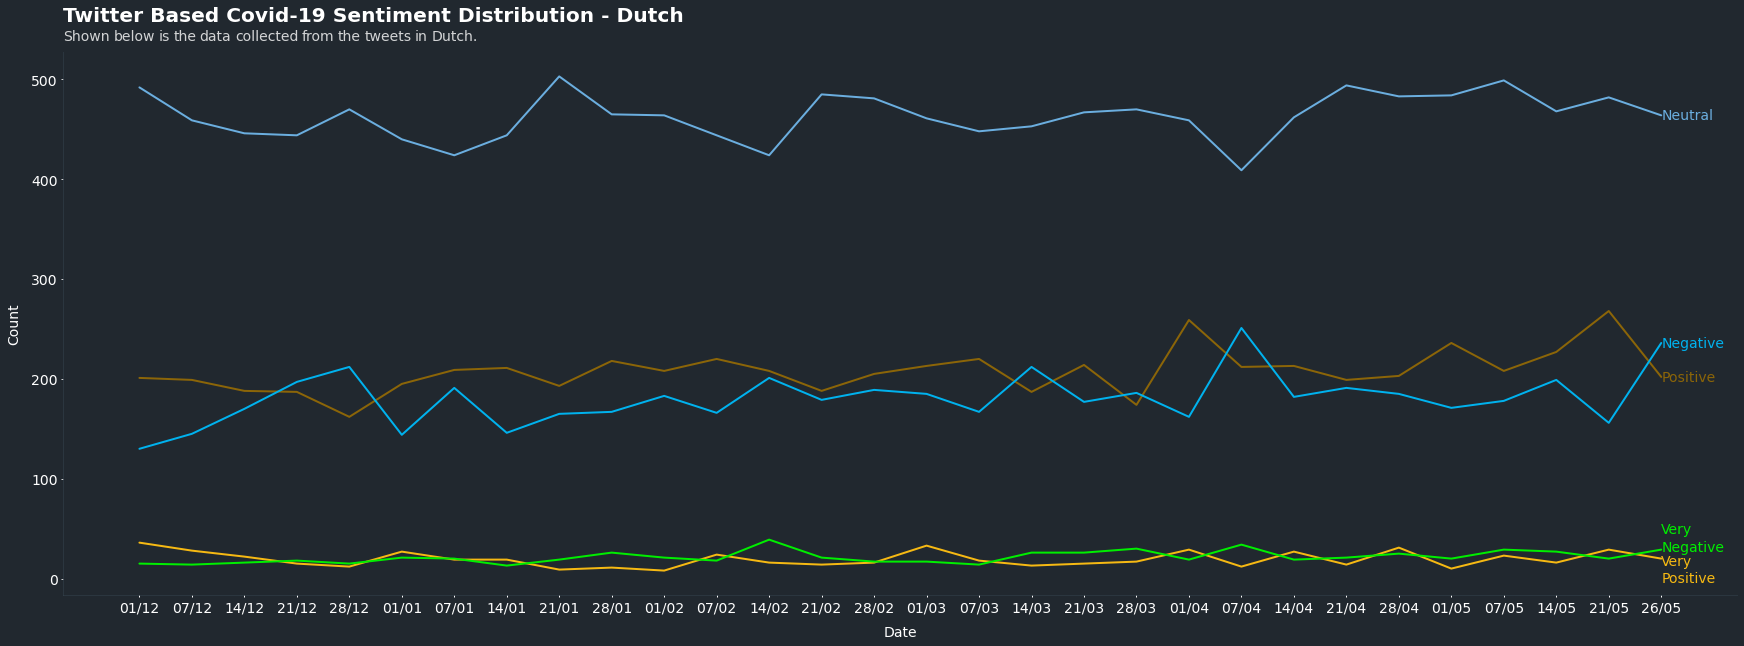

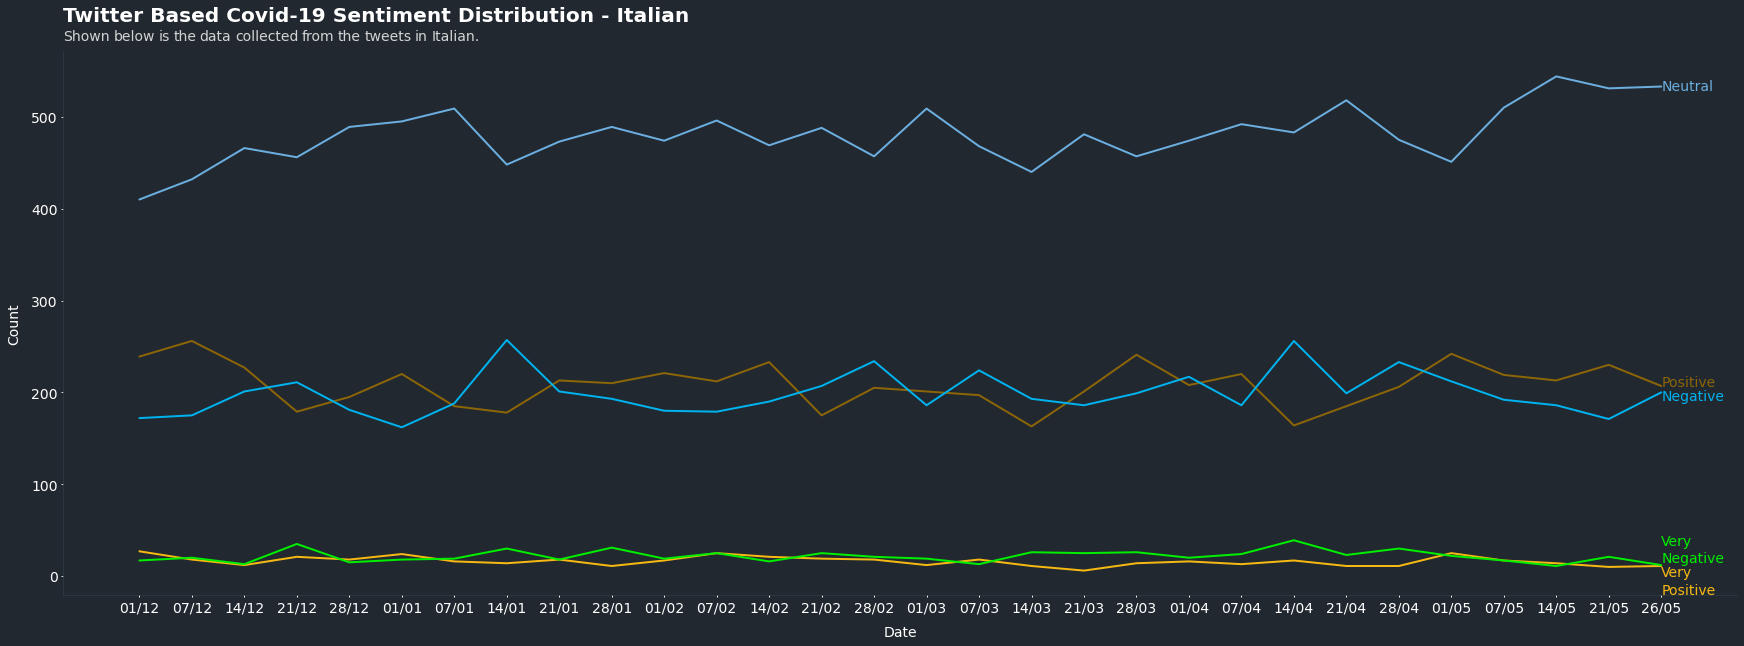

In [15]:

title = 'Twitter Based Covid-19 Sentiment Distribution - Spanish'
caption = """Shown below is the data collected from the tweets in Spanish."""
figname = 'SpanishDistribution'

plotDistributionLines(counts[2], title, caption, figname)

title = 'Twitter Based Covid-19 Sentiment Distribution - French'
caption = """Shown below is the data collected from the tweets in French."""
figname = 'FrenchDistribution'

plotDistributionLines(counts[3], title, caption, figname)

title = 'Twitter Based Covid-19 Sentiment Distribution - German'
caption = """Shown below is the data collected from the tweets in German."""
figname = 'GermanDistribution'

plotDistributionLines(counts[4], title, caption, figname)

title = 'Twitter Based Covid-19 Sentiment Distribution - Dutch'
caption = """Shown below is the data collected from the tweets in Dutch."""
figname = 'DutchDistribution'

plotDistributionLines(counts[5], title, caption, figname)

title = 'Twitter Based Covid-19 Sentiment Distribution - Italian'
caption = """Shown below is the data collected from the tweets in Italian."""
figname = 'ItalianDistribution'

plotDistributionLines(counts[6], title, caption, figname)